# Plot

> A collection of plot functions

## Setup

In [ ]:
#| default_exp data.plot

In [ ]:
#| export
import pandas as pd, seaborn as sns
from fastcore.meta import delegates
from matplotlib import pyplot as plt

# kdock
from kdock.data.core import *

# for visualization
import py3Dmol

## Visualize mol

In [ ]:
#| export
def view_mol(file, #sdf or pdb file
            ):
    "Visualize pdb or sdf file"
    
    v = py3Dmol.view()
    v.addModel(open(file).read())
    v.setStyle({'stick':{}})
    v.zoomTo()
    v.show()

In [ ]:
view_mol('files/7OFF_receptor.pdb')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
#| export
def view_complex(receptor,           # protein file
                 ligand,             # ligand (green), or docked ligand
                 ori_ligand=None,    # original ligand (yellow)
                 box=None            # optional box: [x, y, z, sizeX, sizeY, sizeZ]
                ):

    "Visualize the receptor, ligand, optional original ligand, and optional box via py3Dmol."
    v = py3Dmol.view()
    
    # Load receptor
    v.addModel(open(receptor).read())
    v.setStyle({'cartoon': {}, 'stick': {'radius': 0.15}})
    
    # Load docked ligand
    v.addModel(open(ligand).read())
    v.setStyle({'model': 1}, {'stick': {'colorscheme': 'greenCarbon'}})

    # Load original ligand if provided
    if ori_ligand is not None:
        v.addModel(open(ori_ligand).read())
        v.setStyle({'model': 2}, {'stick': {'colorscheme': 'yellowCarbon'}})

    # Add bounding box if specified
    if box is not None and len(box) == 6:
        x, y, z, sizeX, sizeY, sizeZ = box
        v.addBox({
            'center': {'x': x, 'y': y, 'z': z},
            'dimensions': {'w': sizeX, 'h': sizeY, 'd': sizeZ},
            'color': 'red',
            'opacity': 1,
            'wireframe': True
        })

    v.zoomTo({'model': 1})
    v.show()

In [ ]:
box_list = get_box('files/7OFF_lig.sdf',tolist=True)
box_list

[38.848, -26.77, 10.419, 14.652, 8.942, 12.509]

In [ ]:
view_complex('files/7OFF.pdb','files/7OFF_lig.sdf',box=box_list)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## 2d plot

In [ ]:
#| export
def set_sns():
    sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
    sns.set_context('notebook')
    sns.set_style("ticks")

In [ ]:
set_sns()

In [ ]:
#| export
@delegates(sns.scatterplot)
def plot_2d(X: pd.DataFrame, # a dataframe that has first column to be x, and second column to be y
            **kwargs, # arguments for sns.scatterplot
            ):
    "Make 2D plot from a dataframe that has first column to be x, and second column to be y"
    plt.figure(figsize=(7,7))
    sns.scatterplot(data = X,x=X.columns[0],y=X.columns[1],alpha=0.7,**kwargs)

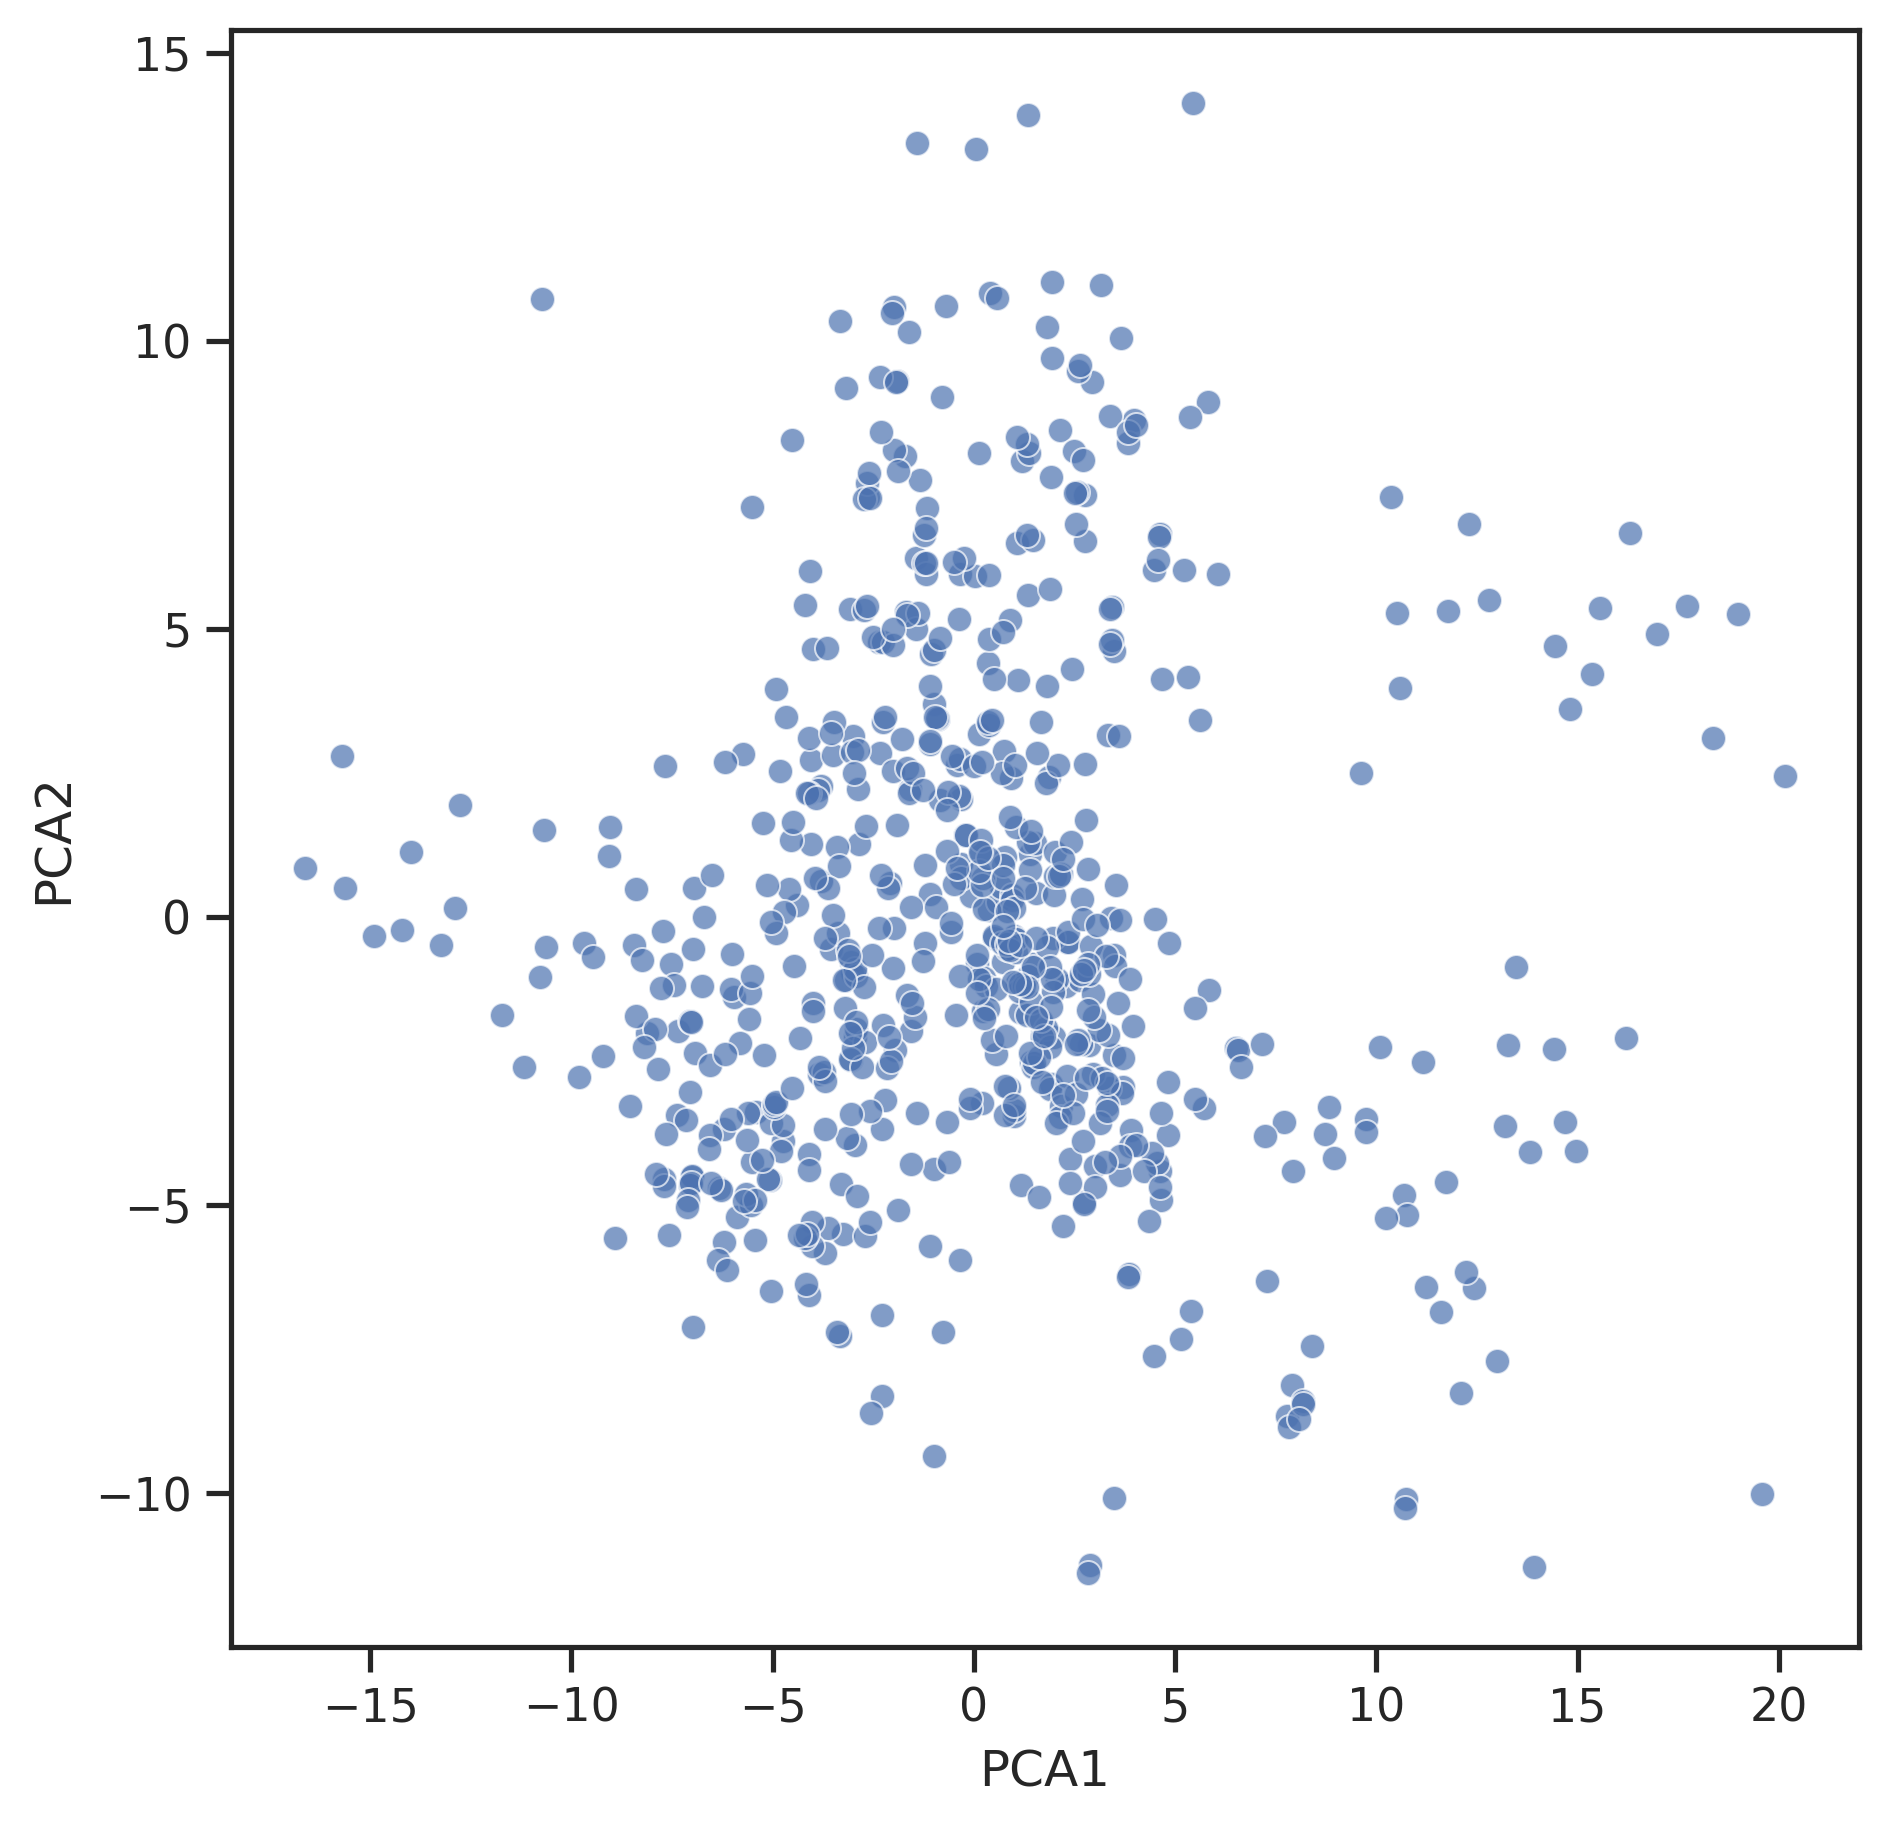

In [ ]:
# plot_2d(pca.iloc[:,:2])

In [ ]:
#| export
def plot_corr(x,#a column of df
              y,#a column of df
              xlabel=None,# x axis label
              ylabel=None,# y axis label
              order=3, # polynomial level, if straight, order=1 
             ):
    sns.regplot(x=x,
            y=y,
            order=order,
            line_kws={'color': 'gray'}
           )
    
    if xlabel is not None:
        plt.xlabel(xlabel)
        
    if ylabel is not None:
        plt.ylabel(ylabel)
    # plt.text(x=0.8, y=0.1, s=f'Spearman: {correlation:.2f}', transform=plt.gca().transAxes, ha='center', va='center');

In [ ]:
# plot_corr(pca.PCA1,pca.PCA2)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()